In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))


from src import dataset


tf.random.set_seed(42)
np.random.seed(42)

2025-12-21 11:40:19.970016: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-21 11:40:21.389501: I external/local_xla/xla/stream_executor/rocm/rocm_executor.cc:920] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-12-21 11:40:21.389553: I external/local_xla/xla/stream_executor/rocm/rocm_executor.cc:920] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-12-21 11:40:21.776166: I external/local_xla/xla/stream_executor/rocm/rocm_executor.cc:920] successful NUMA node read from SysFS had negative value (-1), but there must be a

In [2]:
train_ds, val_ds, test_ds = dataset.create_datasets()

Number of images:  16970
Attributes:  ['id', 'width', 'height', 'file_name', 'license', 'flickr_url', 'coco_url', 'date_captured']

Number of annotations (they refer to images): 16970
Attributes:  ['id', 'image_id', 'category_id', 'segmentation', 'area', 'bbox', 'iscrowd', 'attributes']

IDs don't always match!
17011 != 17000
Size of paths and labels should be the same:  16970 16970 0
Training samples: 10182
Validation samples: 3394
Testing samples: 3394


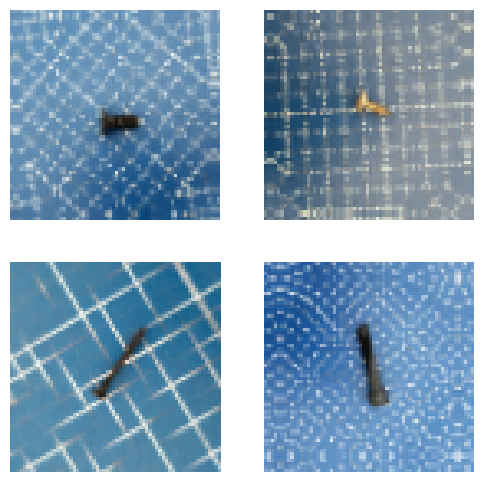

2025-12-21 11:40:39.605338: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [3]:
for images, labels in train_ds.take(1):
    plt.figure(figsize=(6,6))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.imshow(images[i].numpy())
        plt.axis("off")
    plt.show()


In [4]:
def build_baseline_model(num_classes):
    model = models.Sequential([
        layers.Input(shape=(64, 64, 3)),

        layers.Conv2D(32, kernel_size=3, activation="relu"),
        layers.MaxPooling2D(),

        layers.Conv2D(64, kernel_size=3, activation="relu"),
        layers.MaxPooling2D(),

        layers.Conv2D(128, kernel_size=3, activation="relu"),
        layers.MaxPooling2D(),

        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ])

    return model

In [5]:
model = build_baseline_model(num_classes=6)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,974 (2.61 MB)

 Trainable params: 683,974 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [7]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15
)


Epoch 1/15


I0000 00:00:1766313645.948612   14705 service.cc:146] XLA service 0x75a6dc003bf0 initialized for platform ROCM (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1766313645.948643   14705 service.cc:154]   StreamExecutor device (0): AMD Radeon RX 9070 XT, AMDGPU ISA version: gfx1201
2025-12-21 11:40:46.006570: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


  1/637 ━━━━━━━━━━━━━━━━━━━━ 1:24:28 8s/step - accuracy: 0.0625 - loss: 1.8339

I0000 00:00:1766313647.798660   14705 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


637/637 ━━━━━━━━━━━━━━━━━━━━ 81s 115ms/step - accuracy: 0.5416 - loss: 1.2209 - val_accuracy: 0.5675 - val_loss: 1.0781
Epoch 2/15
637/637 ━━━━━━━━━━━━━━━━━━━━ 79s 115ms/step - accuracy: 0.7163 - loss: 0.7579 - val_accuracy: 0.7481 - val_loss: 0.6928
Epoch 3/15
637/637 ━━━━━━━━━━━━━━━━━━━━ 79s 115ms/step - accuracy: 0.7418 - loss: 0.6770 - val_accuracy: 0.7640 - val_loss: 0.6341
Epoch 4/15
637/637 ━━━━━━━━━━━━━━━━━━━━ 79s 116ms/step - accuracy: 0.7666 - loss: 0.6131 - val_accuracy: 0.7222 - val_loss: 0.7029
Epoch 5/15
637/637 ━━━━━━━━━━━━━━━━━━━━ 80s 116ms/step - accuracy: 0.7779 - loss: 0.5783 - val_accuracy: 0.7018 - val_loss: 0.7297
Epoch 6/15
637/637 ━━━━━━━━━━━━━━━━━━━━ 80s 116ms/step - accuracy: 0.7923 - loss: 0.5454 - val_accuracy: 0.7826 - val_loss: 0.5629
Epoch 7/15
637/637 ━━━━━━━━━━━━━━━━━━━━ 80s 116ms/step - accuracy: 0.7991 - loss: 0.5236 - val_accuracy: 0.7873 - val_loss: 0.5537
Epoch 8/15
637/637 ━━━━━━━━━━━━━━━━━━━━ 80s 116ms/step - accuracy: 0.8081 - loss: 0.5048 - val

In [8]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.3f}")


213/213 ━━━━━━━━━━━━━━━━━━━━ 19s 91ms/step - accuracy: 0.7775 - loss: 0.5718
Test accuracy: 0.778


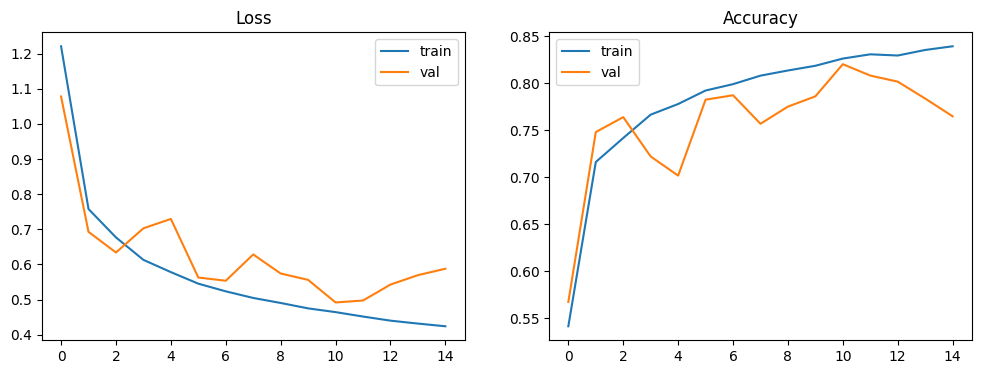

In [9]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.title("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.title("Accuracy")
plt.legend()

plt.show()
